<header class="w3-container w3-teal">
<img src="images/utfsm.png" alt="" height="100px" align="left"/>
<img src="images/mat.png" alt="" height="100px" align="right"/>
</header>
<br/><br/><br/><br/><br/>
# MAT281
## Laboratorio Aplicaciones de la Matemática en la Ingeniería
### Modelamiento y Errores

## INSTRUCCIONES
* Anoten su nombre y rol en la celda siguiente.
* Desarrollen los problemas de manera secuencial.
* Guarden constantemente con ***Ctr-S*** para evitar sorpresas.
* Reemplacen en las celdas de código donde diga #FIX_ME por el código correspondiente.
* Ejecuten cada celda de código utilizando ***Ctr-Enter***

In [1]:
#Configuracion para recargar módulos y librerías cada vez 
%reload_ext autoreload
%autoreload 2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
%matplotlib inline
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
from mat281_code.lab import *
from IPython.core.display import HTML

HTML(open("style/mat281.css", "r").read())

alumno_1 = ("Sebastian Flores", "2004001-7")
alumno_2 = ("Maria Jose Vargas", "2004007-8")

HTML(greetings(alumno_1, alumno_2))

## Problema: Abalone Dataset

Los datos Abalone Dataset corresponden a medidas físicas de abulones u orejas marinas (abalones), una especie de caracoles marinos comestibles. Este set de datos fue descrito por Sam Waugh para su tesis de doctorado, en la cual utilizó los datos para ilustrar el comportamiento de algoritmos de clasificación. Desde entonces, se ha utilizado para verificar algoritmos de clasificación y regresión.

<img src="images/abalone.jpg" alt="" width="600px" align="middle"/>

La base de datos contiene mediciones a 4177 abalones, donde las mediciones posibles son sexo ($S$), largo ($L$), diametro $D$, altura $H$, peso entero $W_1$, peso sin concha $W_2$, peso de visceras $W_3$, peso de concha  $W_4$ y el número de anillos $N$. 

Buscaremos predecir el número de anillos, utilizando las otras variables.

## Modelos propuestos

Los modelos propuestos son los siguientes:

#### Modelo A
$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

#### Modelo B
$$ \log(A) = \beta_0 + \beta_1 W_1 + \beta_2 W_2 +\beta_3 W_3 +\beta W_4 + \beta_5 \log( L  D H ) $$

#### Modelo C
Si $S=male$:
$$ \log(A) = \theta_0^M + \theta_1^M W_2  + \theta_2^M W_4 + \theta_3^M \log( L  D H ) $$
Si $S=female$
$$ \log(A) = \theta_0^F + \theta_1^F W_2  + \theta_2^F W_4 + \theta_3^F \log( L  D H ) $$
Si $S=indefined$
$$ \log(A) = \theta_0^I + \theta_1^I W_2  + \theta_2^I W_4 + \theta_3^I \log( L  D H ) $$


## 1. Descargando los datos
Descargue el archivo a analizar desde el siguiente link:
http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

Guarde el archivo en la carpeta Lab03/data/ con el nombre abalone.data.txt


## 2. Leyendo los datos
A continuación se le provee cierto código para que lea los datos desde el archivo data/abalone.data.txt y los cargue en un arreglo en numpy.

In [4]:
%%bash
head data/abalone.data.txt

M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19


In [42]:
import numpy as np
# Cargando los datos
data = []
fh = open("data/abalone.data.txt","r")
# Estructura de datos:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Ejemplo de linea
conversion_sexo = {"M":+1, "I":0, "F":-1}
for line in fh:
    abalone = line.split(",")
    abalone[0] = conversion_sexo[abalone[0]]
    data.append([float(x) for x in abalone])
fh.close()
# Convertir lista a array
data = np.array(data)
# Limpiando datos erroneos (todos los valores excepto sexo deben ser estricamente positivos)
mask = np.all(data[:,1:]>0, axis=1)
data = data[mask]
# Imprimir datos (opcional)
#print data[:10]

## Desafío 1 (10%)
¿Que significado tiene la siguiente expresión en el código para cargar los datos? ¿Porqué se realiza?

    abalone[0] = conversion_sexo[abalone[0]]

#### Respuesta
...

## 3. Exploración visual de los datos
A continuación se le provee código para generar visualizaciones de los datos. Ejecute secuencialmente e interprete los gráficos.

In [43]:
from matplotlib import pyplot as plt
def plot(data, i, j):
    label = ['Sexo',
             'Largo',
             'Diametro',
             'Altura',
             'Peso Entero',
             'Peso Desconchado',
             'Peso Viscera',
             'Peso Concha',
             'Numero Anillos']
    M_mask = data[:,0] == +1
    I_mask = data[:,0] == 0
    F_mask = data[:,0] == -1
    plt.figure(figsize=(16,8))
    plt.plot(data[:,i][M_mask], data[:,j][M_mask], "og", label="M")
    plt.plot(data[:,i][F_mask], data[:,j][F_mask], "sr", label="F")
    plt.plot(data[:,i][I_mask], data[:,j][I_mask], "<b", label="I")
    plt.xlabel(label[i])
    plt.ylabel(label[j])
    plt.legend()
    plt.show()

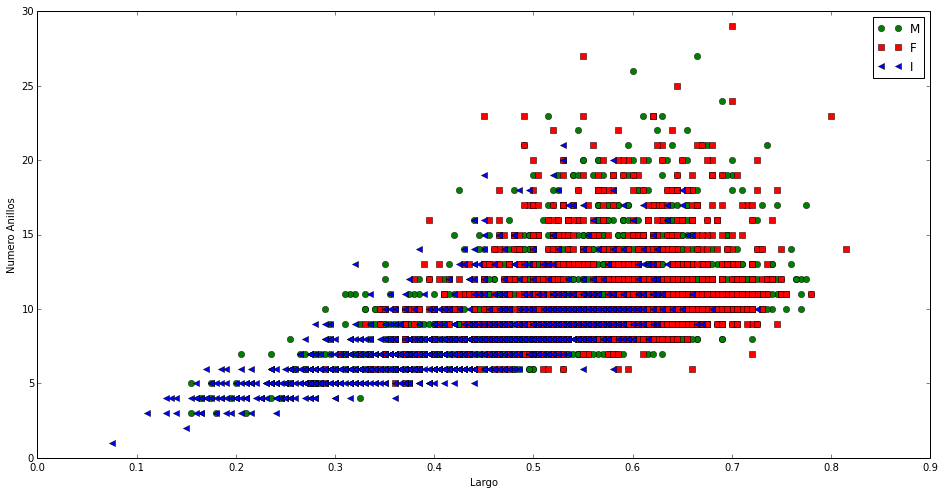

In [44]:
"""
Sandbox: Cambie los parámetros para obtener distintos gráficos

Indices:
0:'Sexo',
1:'Largo',
2:'Diametro',
3:'Altura',
4:'Peso Entero',
5:'Peso Desconchado',
6:'Peso Viscera',
7:'Peso Concha',
8:'Numero Anillos'
"""
plot(data, 1, 8)


## Desafío 2 (20%)
¿Qué variables parecen a priori más relevantes para explicar el número de anillos? ¿El sexo del abalone es relevante?

#### Respuesta
...



## 4. Entrenando y Testeando los Modelos
A continuación se entrega el código necesario para entrenar los distintos modelos y realizar una predicción. 
Se proveen ejemplos de utilización.


#### Modelo A
$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

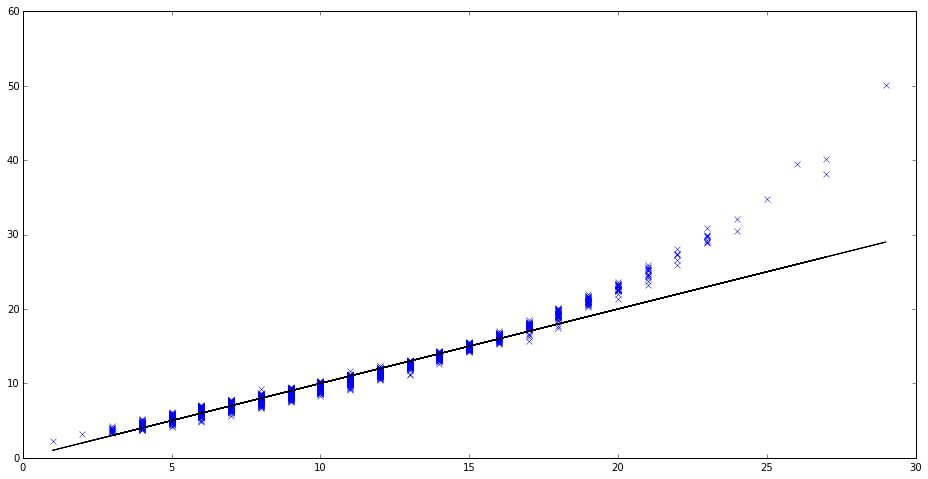

In [61]:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Entrenando el modelo A
def train_model_A(data):
    y = np.log(data[:,-1])
    X = data.copy()
    X[:,0] = 1.0
    X[:,1:4] = np.log(X[:,1:4])
    coeffs = np.linalg.lstsq(X, y)[0]
    return coeffs

# Testeando el modelo A
def test_model_A(data, coeffs):
    X = data.copy()
    X[:,0] = 1.0
    X[:,1:4] = np.log(X[:,1:4])
    ln_anillos = np.dot(X, coeffs)
    return np.exp(ln_anillos)

# Obtener valores y prediccion
coeffs_A = train_model_A(data)
y_pred = test_model_A(data, coeffs_A)

# Mostrar graficamente
y_data = data[:,-1]
plt.figure(figsize=(16,8))
plt.plot(y_data, y_pred, "x")
plt.plot(y_data, y_data, "k-")
plt.show()

#### Modelo B
$$ \log(A) = \beta_0 + \beta_1 W_1 + \beta_2 W_2 +\beta_3 W_3 +\beta W_4 + \beta_5 \log( L  D H ) $$

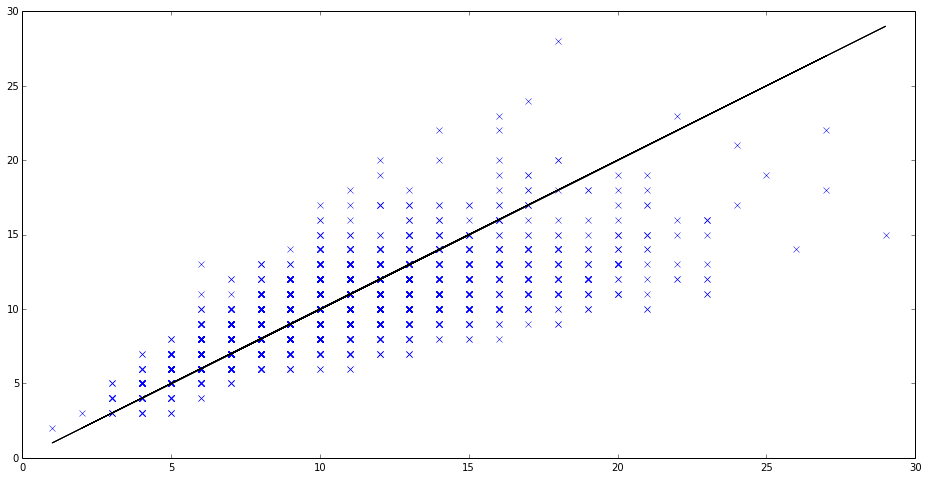

In [80]:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Entrenando el modelo B
def train_model_B(data):
    y = np.log(data[:,-1])
    X = np.ones([data.shape[0],6])
    X[:,0] = 1.0
    X[:,1:5] = data[:,4:8]
    X[:,5] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    coeffs = np.linalg.lstsq(X, y)[0]
    return coeffs

# Testeando el modelo B
def test_model_B(data, coeffs):
    X = np.ones([data.shape[0],6])
    X[:,0] = 1.0
    X[:,1:5] = data[:,4:8]
    X[:,5] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    ln_anillos = np.dot(X, coeffs)
    return np.round(np.exp(ln_anillos))

# Obtener valores y prediccion
coeffs_B = train_model_B(data)
y_pred = test_model_B(data, coeffs_B)

# Mostrar graficamente
plt.figure(figsize=(16,8))
plt.plot(y_data, y_pred, "x")
plt.plot(y_data, y_data, "k-")
plt.show()

#### Modelo C
Si $S=male$:
$$ \log(A) = \theta_0^M + \theta_1^M W_2  + \theta_2^M W_4 + \theta_3^M \log( L  D H ) $$
Si $S=female$
$$ \log(A) = \theta_0^F + \theta_1^F W_2  + \theta_2^F W_4 + \theta_3^F \log( L  D H ) $$
Si $S=indefined$
$$ \log(A) = \theta_0^I + \theta_1^I W_2  + \theta_2^I W_4 + \theta_3^I \log( L  D H ) $$


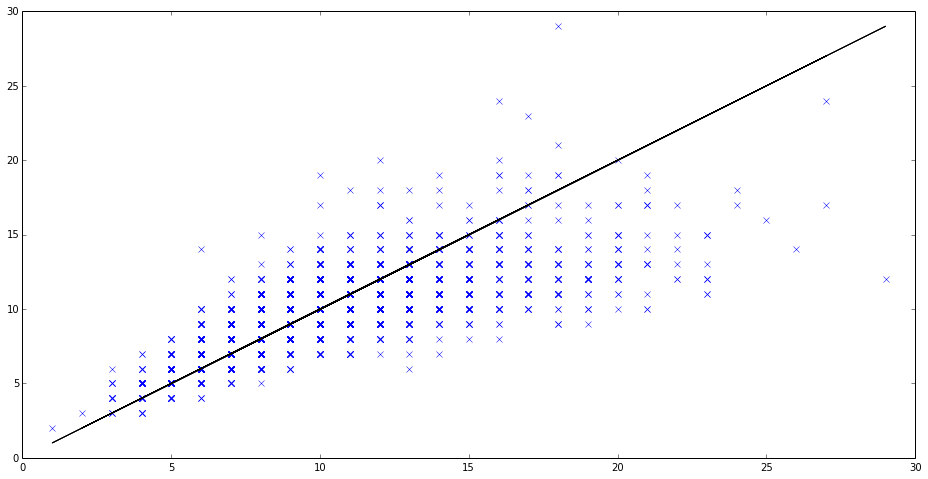

In [77]:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Entrenando el modelo C
def train_model_C(data):
    mask_I = data[:,0] == 0
    mask_M = data[:,0] == +1
    mask_F = data[:,0] == -1
    y = np.log(data[:,-1])
    X = np.ones([data.shape[0], 4])
    X[:,0] = 1.0
    X[:,1] = data[:,5]
    X[:,2] = data[:,7]
    X[:,3] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    coeffs_I = np.linalg.lstsq(X[mask_I], y[mask_I])[0]
    coeffs_M = np.linalg.lstsq(X[mask_M], y[mask_M])[0]
    coeffs_F = np.linalg.lstsq(X[mask_F], y[mask_F])[0]
    return (coeffs_I, coeffs_M, coeffs_F)

# Testeando el modelo C
def test_model_C(data, coeffs):
    mask_I = data[:,0] == 0
    mask_M = data[:,0] == +1
    mask_F = data[:,0] == -1
    y = np.log(data[:,-1])
    X = np.ones([data.shape[0], 4])
    X[:,0] = 1.0
    X[:,1] = data[:,5]
    X[:,2] = data[:,7]
    X[:,3] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    # Fill up the solution
    ln_anillos = np.zeros(data[:,0].shape)
    ln_anillos[mask_I] = np.dot(X[mask_I], coeffs[0])
    ln_anillos[mask_M] = np.dot(X[mask_M], coeffs[1])
    ln_anillos[mask_F] = np.dot(X[mask_F], coeffs[-1])
    return np.round(np.exp(ln_anillos))

# Obtener valores y prediccion
coeffs_C = train_model_C(data)
y_pred = test_model_C(data, coeffs_C)

# Mostrar graficamente
plt.figure(figsize=(16,8))
plt.plot(y_data, y_pred, "x")
plt.plot(y_data, y_data, "k-")
plt.show()

## Desafío 3 (20%)
Realice un gráfico en el cual se comparan simultáneamente el número de anillos reales vs el número de anillos estimados con los modelos A, B y C, únicamente para el caso de los abalones de sexo masculino.

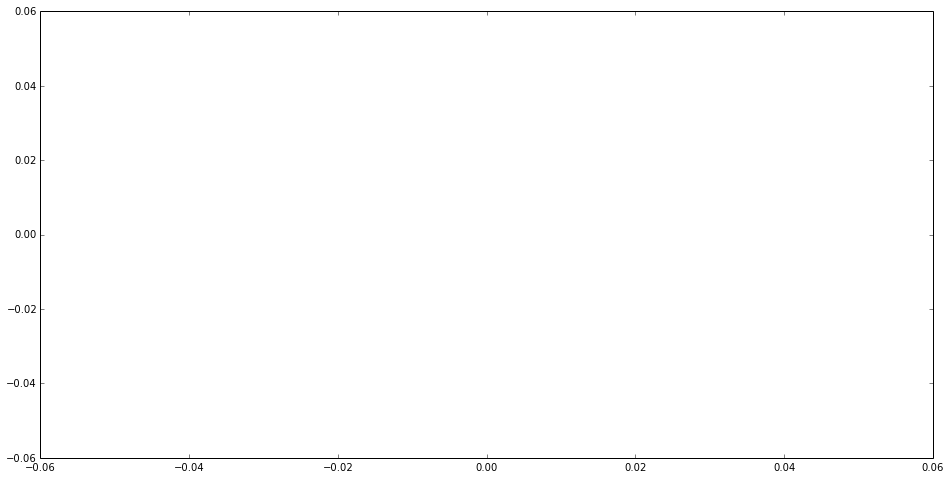

In [86]:
# Realice aqui su grafico
plt.figure(figsize=(16,8))
plt.plot()
plt.show()

## 5. Obteniendo el error de medición

Utilice Holdout Set o Cross Validation para obtener una estimación razonable del error predictivo de los modelos A, B y C. Justifique la decisión realizada. No se entrega la implementación numérica de los métodos, pero puede basarse en los códigos provistos en clases:

* [Holdout Set](https://github.com/usantamaria/mat281/blob/master/clases/Unidad3-ModelamientoyError/Clase02-HoldoutSet/HoldoutSet.ipynb)

* [Cross Validation](https://github.com/usantamaria/mat281/blob/master/clases/Unidad3-ModelamientoyError/Clase03-CrossValidation/CrossValidationYNormas.ipynb)

In [82]:
# Implemente aquí su algoritmo para obtener el error predictivo de los métodos





## Desafío 4 (50%)

#### 1. ¿Cuál es el error predictivo tiene el modelo A?
    # FIX ME

#### 2. ¿Cuál es el error predictivo tiene el modelo B?
    # FIX ME

#### 3. ¿Cuál es el error predictivo tiene el modelo C?
    # FIX ME

#### 4. ¿Cuál modelo resulta mejor? ¿Cuál es su explicación?
    # FIX ME

#### 5. ¿Existe algún modelo que sea dimensionablemente consistente?
    # FIX ME
